In [19]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nirmalsankalana/rice-leaf-disease-image")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/rice-leaf-disease-image


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import cv2
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications import DenseNet121, ResNet50
from keras.optimizers import Adam
sns.set()

In [21]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = '/kaggle/input/rice-leaf-disease-image',
    batch_size = 32,
    image_size = (80, 80),
    shuffle = True
)

Found 5932 files belonging to 4 classes.


In [22]:
class_names = dataset.class_names

In [23]:
class_names

['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']

In [24]:
print('The number of batches in the dataset is:', len(dataset))
print('The number of classes in the dataset is:', len(class_names))
print('The classes in the dataset are:', class_names)
for images, labels in dataset.take(1):
    print('The number of images in each batch is:', len(images))
    print('The shape of each images is:', images[0].shape)

The number of batches in the dataset is: 186
The number of classes in the dataset is: 4
The classes in the dataset are: ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']
The number of images in each batch is: 32
The shape of each images is: (80, 80, 3)


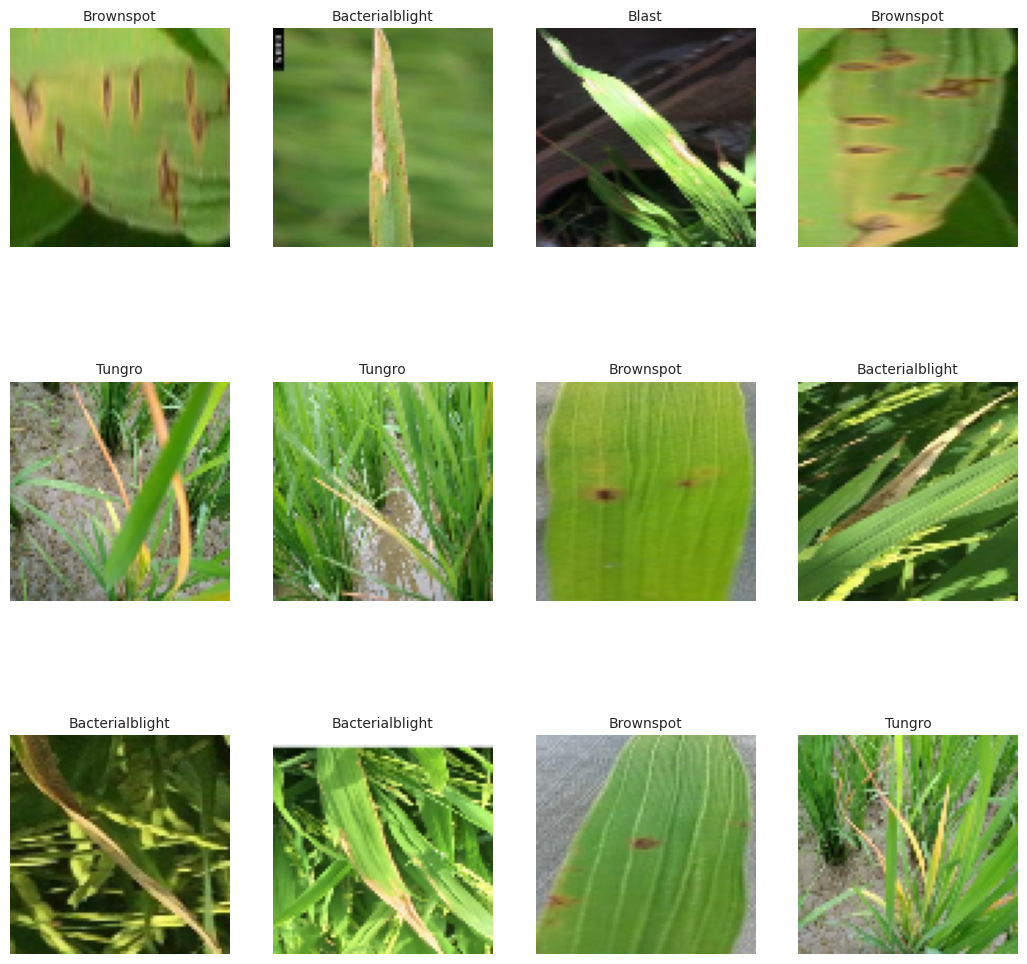

In [25]:
plt.figure(figsize = (13, 13))
for images, labels in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype('int32'))
        plt.title(class_names[labels[i].numpy()], fontsize = 10)
        plt.axis('off')

In [26]:
dataset = dataset.map(lambda x, y: (x / 255, y))

In [27]:
for images, labels in dataset.take(1):
    print(images[0])

tf.Tensor(
[[[0.3971201  0.5461397  0.11084559]
  [0.37334558 0.5223652  0.09491421]
  [0.32971814 0.47481617 0.0591299 ]
  ...
  [0.6095588  0.6252451  0.6213235 ]
  [0.5579044  0.5735907  0.5696691 ]
  [0.5875     0.60318625 0.5992647 ]]

 [[0.38921568 0.54607844 0.10159314]
  [0.40300244 0.55943626 0.12150735]
  [0.38192403 0.5348652  0.10741422]
  ...
  [0.5509804  0.56666666 0.5627451 ]
  [0.56789213 0.5835784  0.57965684]
  [0.6064338  0.6221201  0.6181985 ]]

 [[0.3392157  0.50784314 0.05294118]
  [0.3632353  0.53137255 0.08186275]
  [0.3867647  0.5514706  0.1122549 ]
  ...
  [0.53296566 0.54865193 0.54473037]
  [0.5990196  0.61470586 0.6107843 ]
  [0.6110294  0.62671566 0.6227941 ]]

 ...

 [[0.8156863  0.83137256 0.84313726]
  [0.80582106 0.82150733 0.83327204]
  [0.7946691  0.81035537 0.8221201 ]
  ...
  [0.5255515  0.7098652  0.39699754]
  [0.53210783 0.71642154 0.40355393]
  [0.5208946  0.70520836 0.3920956 ]]

 [[0.8213848  0.83707106 0.84883577]
  [0.8216299  0.83731616 0

In [28]:
def train_test_val_split(data):
    train_data = data.take(int(len(data) * 0.8))
    test_data = data.skip(int(len(data) * 0.8)).take(int(len(data) * 0.1))
    val_data = data.skip(int(len(data) * 0.8) + int(len(data) * 0.1)).take(int(len(data) * 0.1))
    return train_data, test_data, val_data

In [29]:
train_data, test_data, val_data = train_test_val_split(dataset)

In [30]:
print('The number of batches in the training set is:', len(train_data))
print('The number of batches in the test set is:', len(test_data))
print('The number of batches in the validation set is:', len(val_data))

The number of batches in the training set is: 148
The number of batches in the test set is: 18
The number of batches in the validation set is: 18


In [41]:
model = Sequential()

In [42]:
model.add(Input(shape = (80, 80, 3)))
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))

In [43]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [44]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2)

In [45]:
history = model.fit(train_data, epochs = 100, validation_data = val_data, callbacks = [early_stopping])

Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.4667 - loss: 1.3658 - val_accuracy: 0.8090 - val_loss: 0.6360
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.8218 - loss: 0.4983 - val_accuracy: 0.8663 - val_loss: 0.3360
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.8980 - loss: 0.2886 - val_accuracy: 0.9392 - val_loss: 0.1622
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9516 - loss: 0.1470 - val_accuracy: 0.9566 - val_loss: 0.1273
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9662 - loss: 0.0993 - val_accuracy: 0.9809 - val_loss: 0.0667
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9832 - loss: 0.0586 - val_accuracy: 0.9913 - val_loss: 0.0445
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9866 - loss: 0.0458 - val_accuracy: 0.9826 - val_loss: 0.0604
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9870 - loss: 0.0346 - 

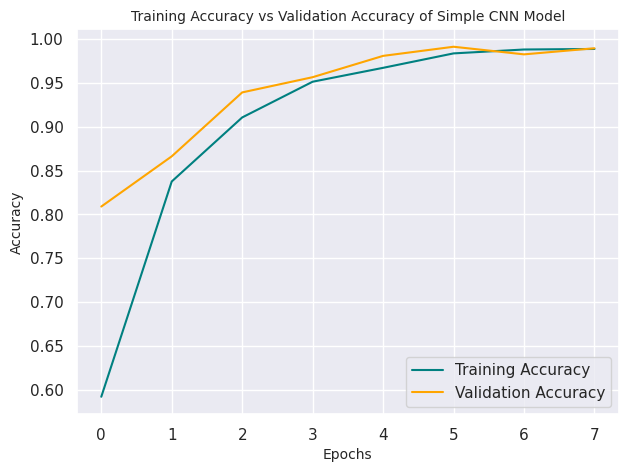

In [47]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy of Simple CNN Model', fontsize = 10)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

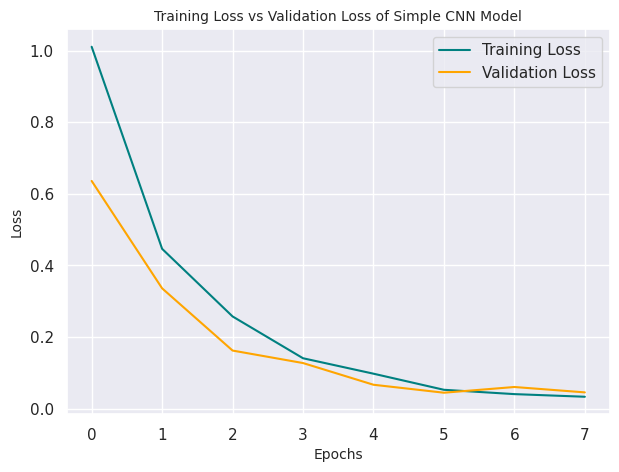

In [48]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss of Simple CNN Model', fontsize = 10)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [50]:
model.evaluate(test_data)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9801 - loss: 0.0470


[0.04168142378330231, 0.9861111044883728]

In [54]:
base_model = DenseNet121(weights = 'imagenet', include_top = False, input_shape = (80, 80, 3))

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [55]:
model2 = Sequential()

In [56]:
model2.add(base_model)
model2.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4, activation = 'softmax'))

In [58]:
model2.compile(
    optimizer = Adam(learning_rate = 1e-4),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [59]:
early_stopping2 = EarlyStopping(monitor = 'val_loss', patience = 2)

In [60]:
history2 = model2.fit(train_data, epochs = 100, validation_data = val_data, callbacks = [early_stopping2])

Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 138s 137ms/step - accuracy: 0.5696 - loss: 1.1019 - val_accuracy: 0.9653 - val_loss: 0.2831
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.9461 - loss: 0.2109 - val_accuracy: 1.0000 - val_loss: 0.0387
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.9892 - loss: 0.0723 - val_accuracy: 0.9948 - val_loss: 0.0128
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9974 - loss: 0.0346 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9978 - loss: 0.0214 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 1.0000 - loss: 0.0134 - val_accuracy: 0.9983 - val_loss: 0.0066
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.9982 - loss: 0.0128 - val_accuracy: 0.9965 - val_loss: 0.0096


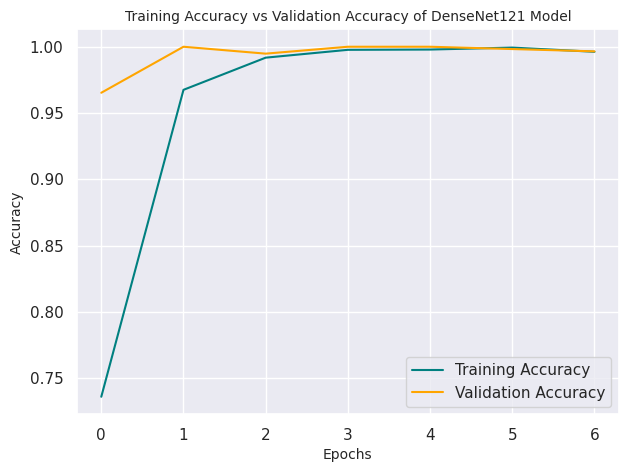

In [61]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy of DenseNet121 Model', fontsize = 10)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

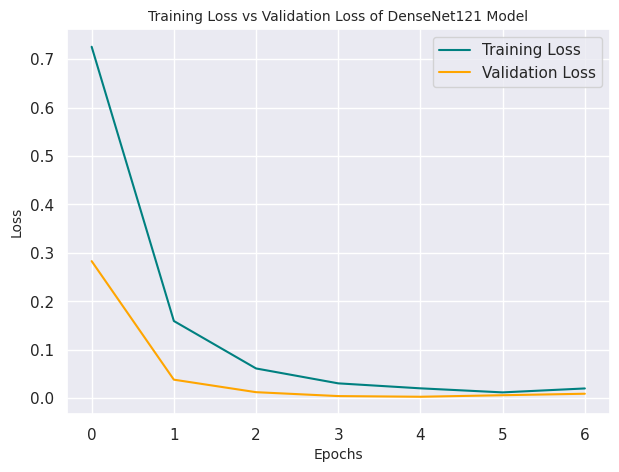

In [62]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history2.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss of DenseNet121 Model', fontsize = 10)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [63]:
model2.evaluate(test_data)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9932 - loss: 0.0233


[0.01738308183848858, 0.9947916865348816]

In [64]:
base_model2 = ResNet50(weights = 'imagenet', include_top = False, input_shape = (80, 80, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [75]:
model3 = Sequential()

In [76]:
model3.add(base_model2)
model3.add(Flatten())
model3.add(Dense(4, activation = 'softmax'))

In [77]:
model3.compile(
    optimizer = Adam(learning_rate = 1e-4),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [78]:
early_stopping3 = EarlyStopping(monitor = 'val_loss', patience = 2)

In [79]:
history3 = model3.fit(train_data, epochs = 100, validation_data = val_data, callbacks = [early_stopping3])

Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 60s 108ms/step - accuracy: 0.9178 - loss: 0.2536 - val_accuracy: 0.2708 - val_loss: 34.5751
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.9915 - loss: 0.0389 - val_accuracy: 0.2743 - val_loss: 13.8111
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9905 - loss: 0.0280 - val_accuracy: 0.5642 - val_loss: 4.6657
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.9959 - loss: 0.0134 - val_accuracy: 0.9618 - val_loss: 0.1678
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.9955 - loss: 0.0191 - val_accuracy: 0.9896 - val_loss: 0.0525
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.9961 - loss: 0.0116 - val_accuracy: 0.9965 - val_loss: 0.0079
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.9984 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 6.9872e-04
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9994 - 

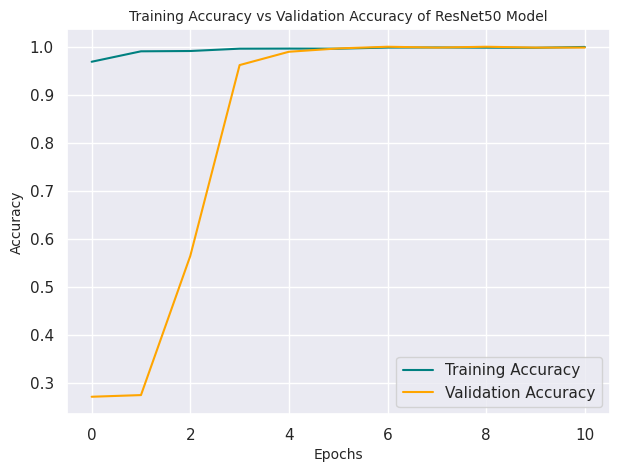

In [80]:
plt.figure(figsize = (7, 5))
plt.plot(history3.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history3.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy of ResNet50 Model', fontsize = 10)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

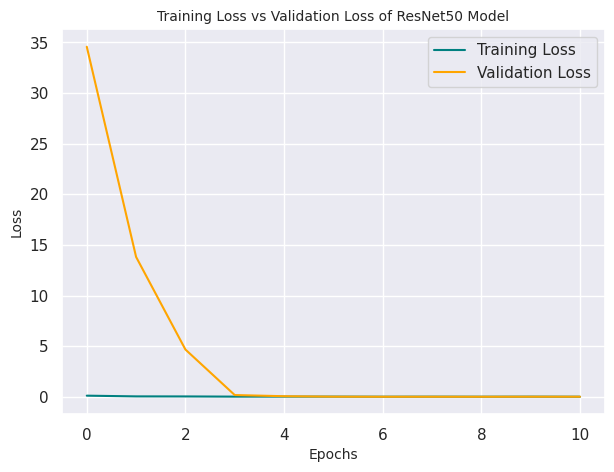

In [81]:
plt.figure(figsize = (7, 5))
plt.plot(history3.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history3.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss of ResNet50 Model', fontsize = 10)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [82]:
model3.evaluate(test_data)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9976 - loss: 0.0056


[0.005864957347512245, 0.9982638955116272]